## Import libraries and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")


%matplotlib inline


pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)

df_raw = pd.read_csv("./data/train.csv")
print(df_raw.shape)
df_raw.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## EDA

### Schema Specification

In [2]:
with open("manual_schema.json") as fp:
    dtypes_schema = eval(fp.read().replace("//", "#"))

df_raw = df_raw.astype(dtypes_schema)

numerical_vars = df_raw.select_dtypes('number').columns.values
categorical_vars = df_raw.select_dtypes('category').columns.values
object_vars = df_raw.select_dtypes('object').columns.values

print("Total dtypes:\n\t---->", {str(x) for x in df_raw.dtypes.value_counts().index})
print("Numerical Columns:\n\t---->", numerical_vars)
print("Categrorical columns:\n\t---->", categorical_vars)
print("Str type columns:\n\t---->", object_vars)

Total dtypes:
	----> {'object', 'float64', 'int64', 'category'}
Numerical Columns:
	----> ['LotFrontage' 'LotArea' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'SalePrice']
Categrorical columns:
	----> ['MSSubClass' 'MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour'
 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1'
 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond'
 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu' 'GarageType'
 'GarageFinish' 'GarageQua

In [3]:
## UTILITY Functions
from matplotlib import colors as mcolors
import random

random.seed(1234)

COLORS = [x for x in list(mcolors.cnames.values()) if ((x!='FFFFFF' or x!='#000000') and (x < '#F00000'))]


def get_n_rows(n):
    div, f_div = n/2, n//2
    n_rows = f_div if div == f_div else f_div + 1
    return n_rows

In [4]:
## continuous variable
from typing import List

class CatEDA:

    COLORS: List = [x for x in list(mcolors.cnames.values()) if ((x!='FFFFFF' or x!='#000000') and (x < '#F00000'))]

    def __init__(self, df, target=None):
        self.df = df
        self.target = target

    def univ_analysis(self, col, target=False, relative_plot=False, cp='Accent', title=None, fig_ax=None):
        __passed_target = target
        target = self.target if type(__passed_target)!=str else target

        __custom_func = lambda x, total_rows : round((x.shape[0]/total_rows)*100, 2)
        __analysis_cols = [col, target]

        agg_df = self.df.groupby(col)[__analysis_cols].agg(
            avg_target = (target, "mean"),
            frequency = (col, 'count'),
            proportion = (col, lambda x: __custom_func(x, self.df.shape[0]))
        ).sort_values(by=['frequency'], ascending=[False]).reset_index()

        order_cols = agg_df[col].values

        _, ax1 = plt.subplots(figsize=(12,6)) if not fig_ax else fig_ax

        bar_y = 'proportion' if relative_plot else 'frequency'
        sns.barplot(data=agg_df, x=col, y=bar_y, order=order_cols, palette=sns.color_palette(cp), ax=ax1)
        ax1.set_ylabel(bar_y.capitalize())

        lbls = [f'{p:.0f}%' for p in agg_df[bar_y].values]
        ax1.bar_label(container=ax1.containers[0], labels=lbls, label_type='edge', rotation=20, fontsize=10)


        if __passed_target:
            # executes only when target is either true or some_col
            ax2 = ax1.twinx()
            self.univ_analysis_with_target(col=col, agg_df=agg_df, target=target, fig_ax=(_, ax2))

        if title:
            ax1.set_title(title)
        sns.despine(bottom = False, left = False)

    def univ_analysis_with_target(self, col, target=True, relative_plot=False, cp='Accent', title=None, agg_df=None, fig_ax = None):
        if target==True:
            target = self.target

        if agg_df is None:
            return self.univ_analysis(col=col, target=target, relative_plot=relative_plot, cp=cp, title=title, fig_ax=fig_ax)
        
        _, ax2 = plt.subplots(figsize=(12,6)) if not fig_ax else fig_ax

        # mec - markeredgecolor, mew - markeredgewidth, mfc - markerfacecolor, mfcalt - markerfacecoloralt
        sns.lineplot(data=agg_df['avg_target'], ax=ax2, marker='o', sizes=(50, 100), mfc="green")#, color='blue')
        _ = ax2.set_yticklabels(labels=[str(int(x/1000))+'k' for x in ax2.get_yticks()])
        ax2.set_ylabel(f"Avg. {target}")

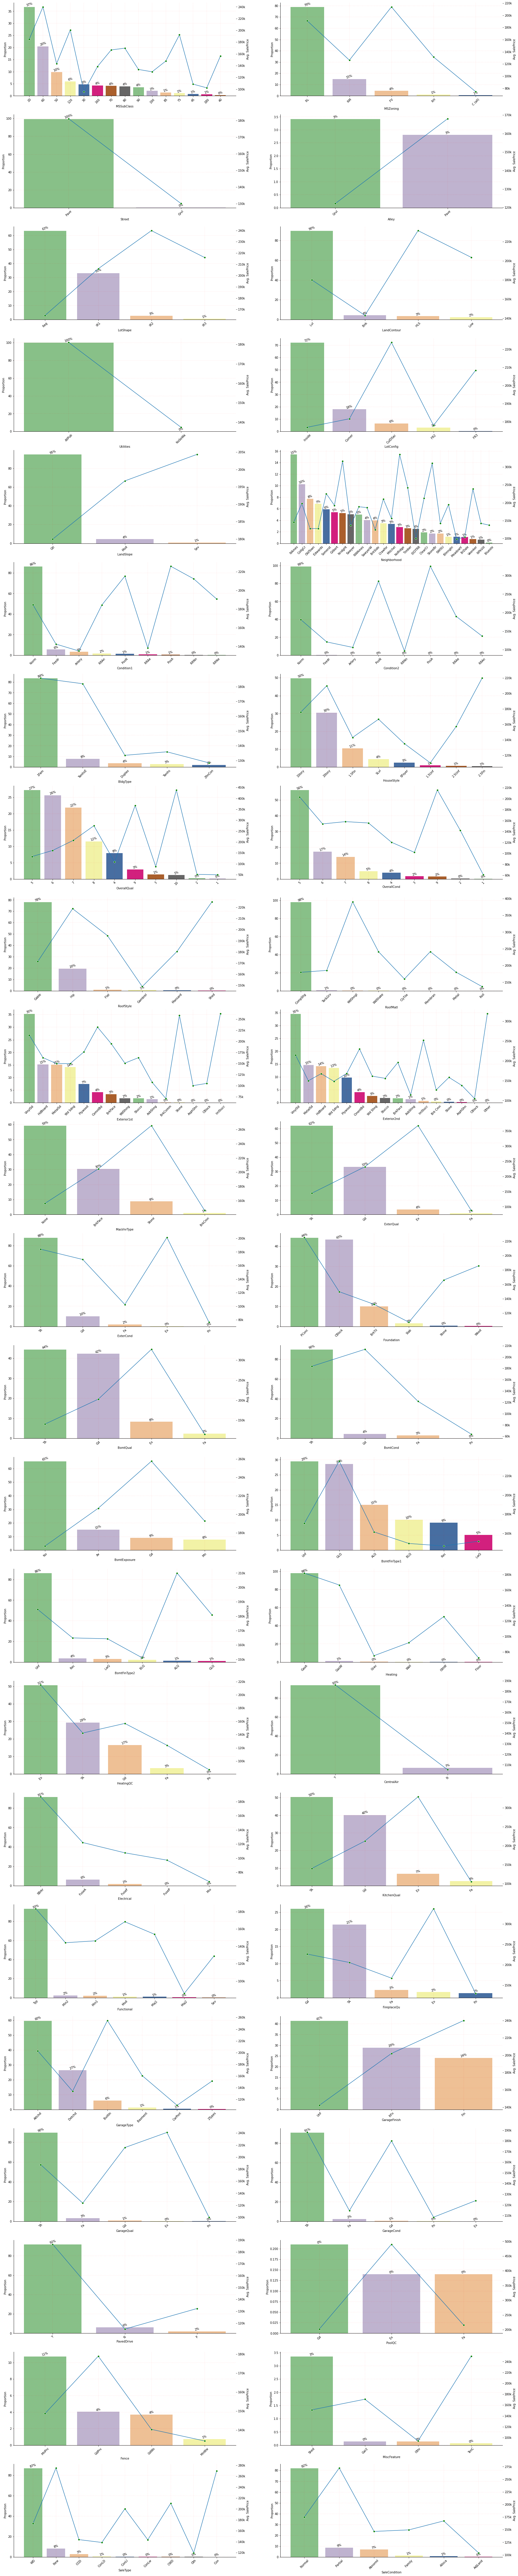

In [5]:
cat_eda = CatEDA(df=df_raw, target="SalePrice")

cat_cols = df_raw.select_dtypes('category').columns.tolist() # + object_vars.tolist() # for eda consider them as cats
plt.figure(figsize=(30, 3.5*len(cat_cols)))
plt.tight_layout()
n_rows = get_n_rows(len(cat_cols))
for ix, x in enumerate(cat_cols):
    ax1 = plt.subplot(n_rows, 2, ix+1)
    cat_eda.univ_analysis(col=x, target='SalePrice', relative_plot=True, fig_ax=(_, ax1))
    ax1.tick_params(axis='x', rotation=45)

    ax1.grid(color='red', linestyle=':', linewidth=0.15)

plt.show()

MoSold    0
YrSold    0
dtype: int64


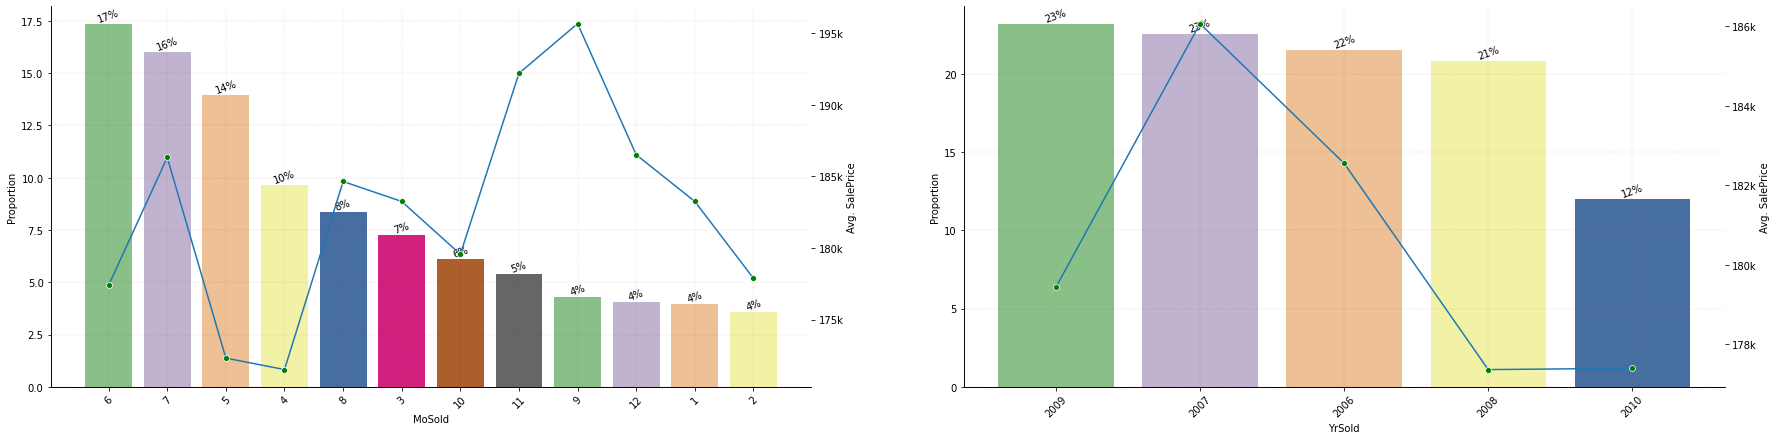

In [6]:
## date/ datetime/ year/ month wise analysis
dt_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
dt_cat_cols = ['MoSold', 'YrSold'] # consider them as cat
print(df_raw[dt_cat_cols].astype(float).isna().sum())

plt.figure(figsize=(30, 3.5*len(dt_cat_cols)))
plt.tight_layout()
n_rows = get_n_rows(len(dt_cat_cols))
for ix, x in enumerate(dt_cat_cols):
    ax1 = plt.subplot(n_rows, 2, ix+1)
    cat_eda.univ_analysis(col=x, target='SalePrice', relative_plot=True, fig_ax=(_, ax1))
    ax1.tick_params(axis='x', rotation=45)

    ax1.grid(color='red', linestyle=':', linewidth=0.15)

plt.show()

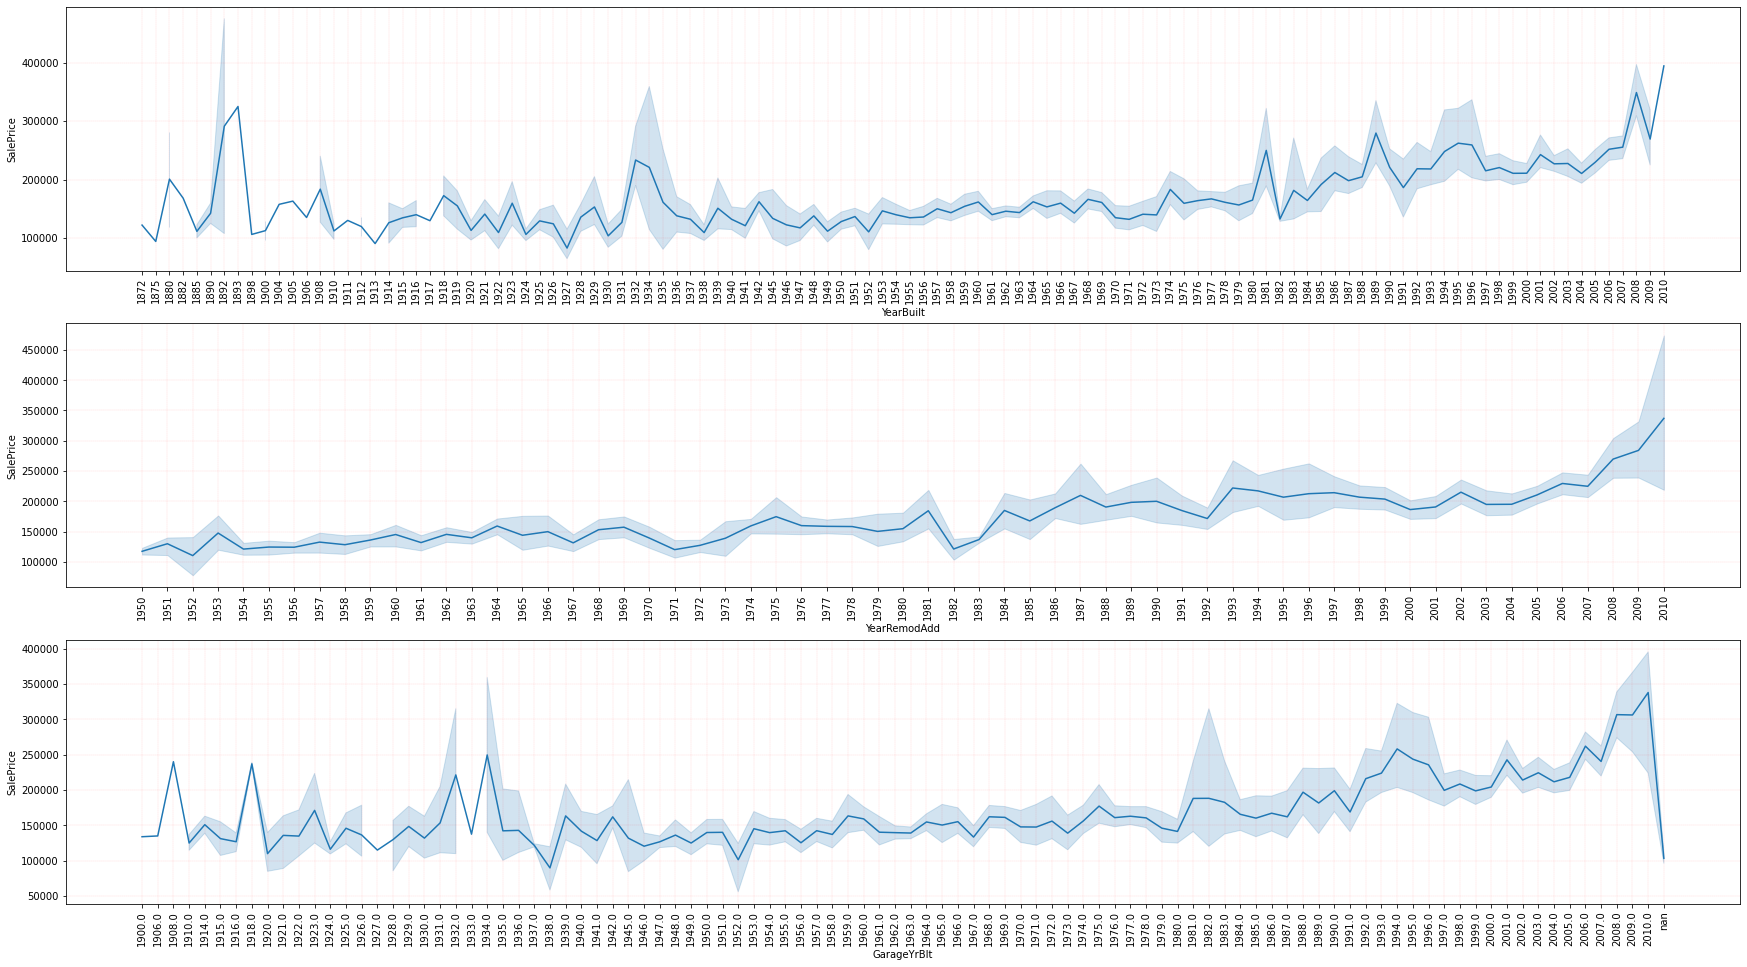

In [7]:
dt_num_cols = [x for x in dt_cols if x not in dt_cat_cols]

plt.figure(figsize=(30, 5.5*len(dt_num_cols)))
plt.tight_layout()
# n_rows = get_n_rows(len(dt_num_cols))
for ix, x in enumerate(dt_num_cols):
    ax1 = plt.subplot(len(dt_num_cols), 1, ix+1)
    # cat_eda.univ_analysis(col=x, target='SalePrice', relative_plot=True, fig_ax=(_, ax1))
    sns.lineplot(data=df_raw[df_raw[x]!=np.nan].sort_values(by=[x]), x=x, y='SalePrice', ax=ax1)
    ax1.tick_params(axis='x', rotation=90)

    ax1.grid(color='red', linestyle=':', linewidth=0.15)

plt.show()

# sns.lineplot(data=df_raw, x='YearBuilt', y='SalePrice')

['#708090', '#006400', '#00FFFF', '#0000FF', '#B0E0E6', '#90EE90', '#000000', '#0000CD', '#00FA9A', '#708090', '#7FFF00', '#9400D3', '#008080', '#00FF7F', '#00FF00', '#C0C0C0', '#40E0D0', '#808080', '#8B0000', '#800000', '#000080', '#800080', '#00BFFF', '#4B0082', '#7CFC00', '#808080', '#008000', '#8B008B', '#00FFFF']


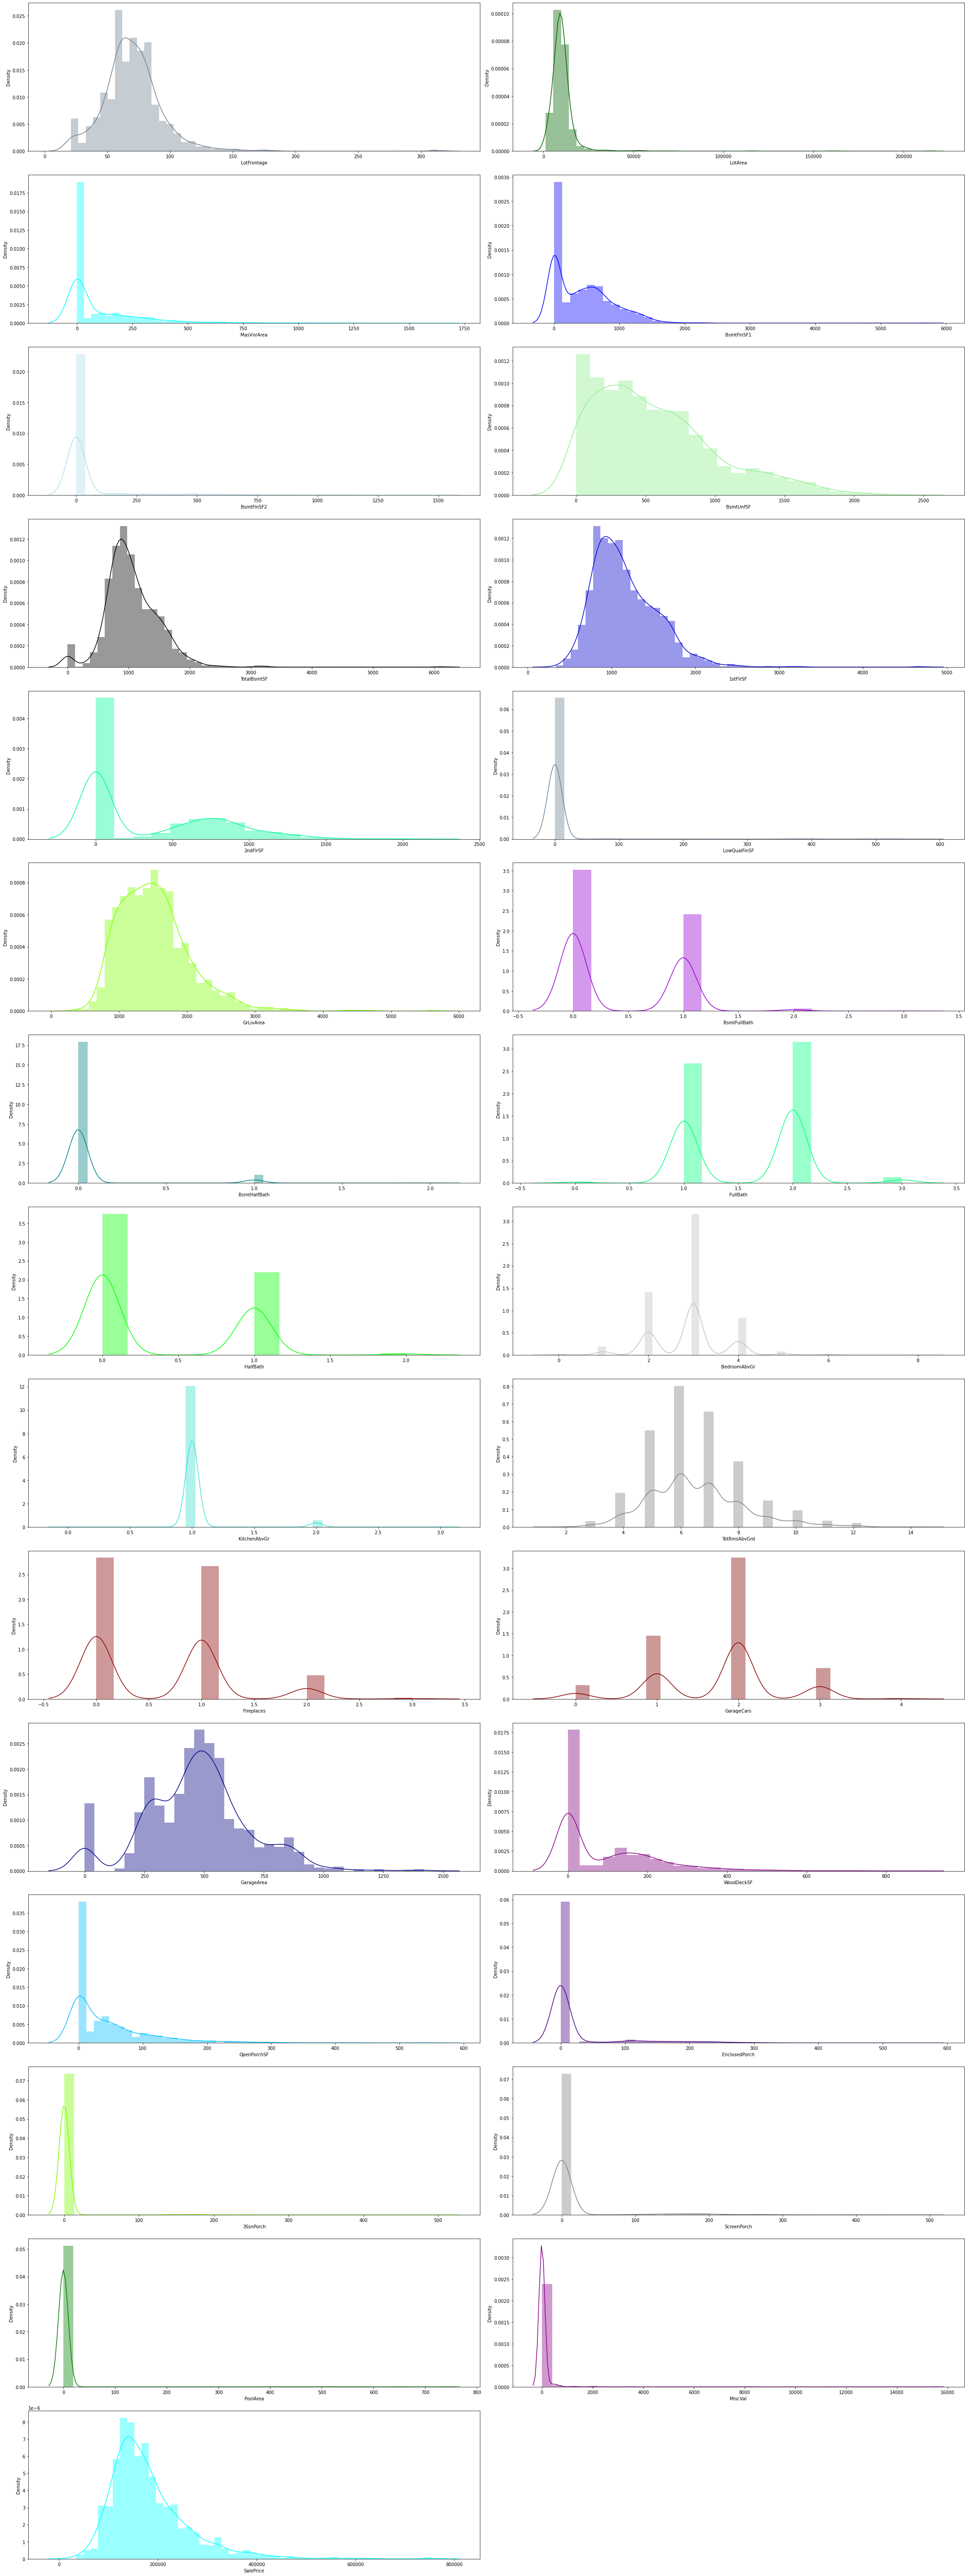

In [8]:
## distribution plots
plt.figure(figsize=(30, 2.75*len(numerical_vars)))

n_rows = get_n_rows(len(numerical_vars))

color_tmp = random.sample([col for col in COLORS if col.count('0') > 1], k=len(numerical_vars))
print(color_tmp)
for ix, each_num_var in enumerate(numerical_vars):
    plt.subplot(n_rows, 2, ix+1)
    sns.distplot(df_raw[each_num_var], color=color_tmp[ix])

plt.tight_layout()

<AxesSubplot:>

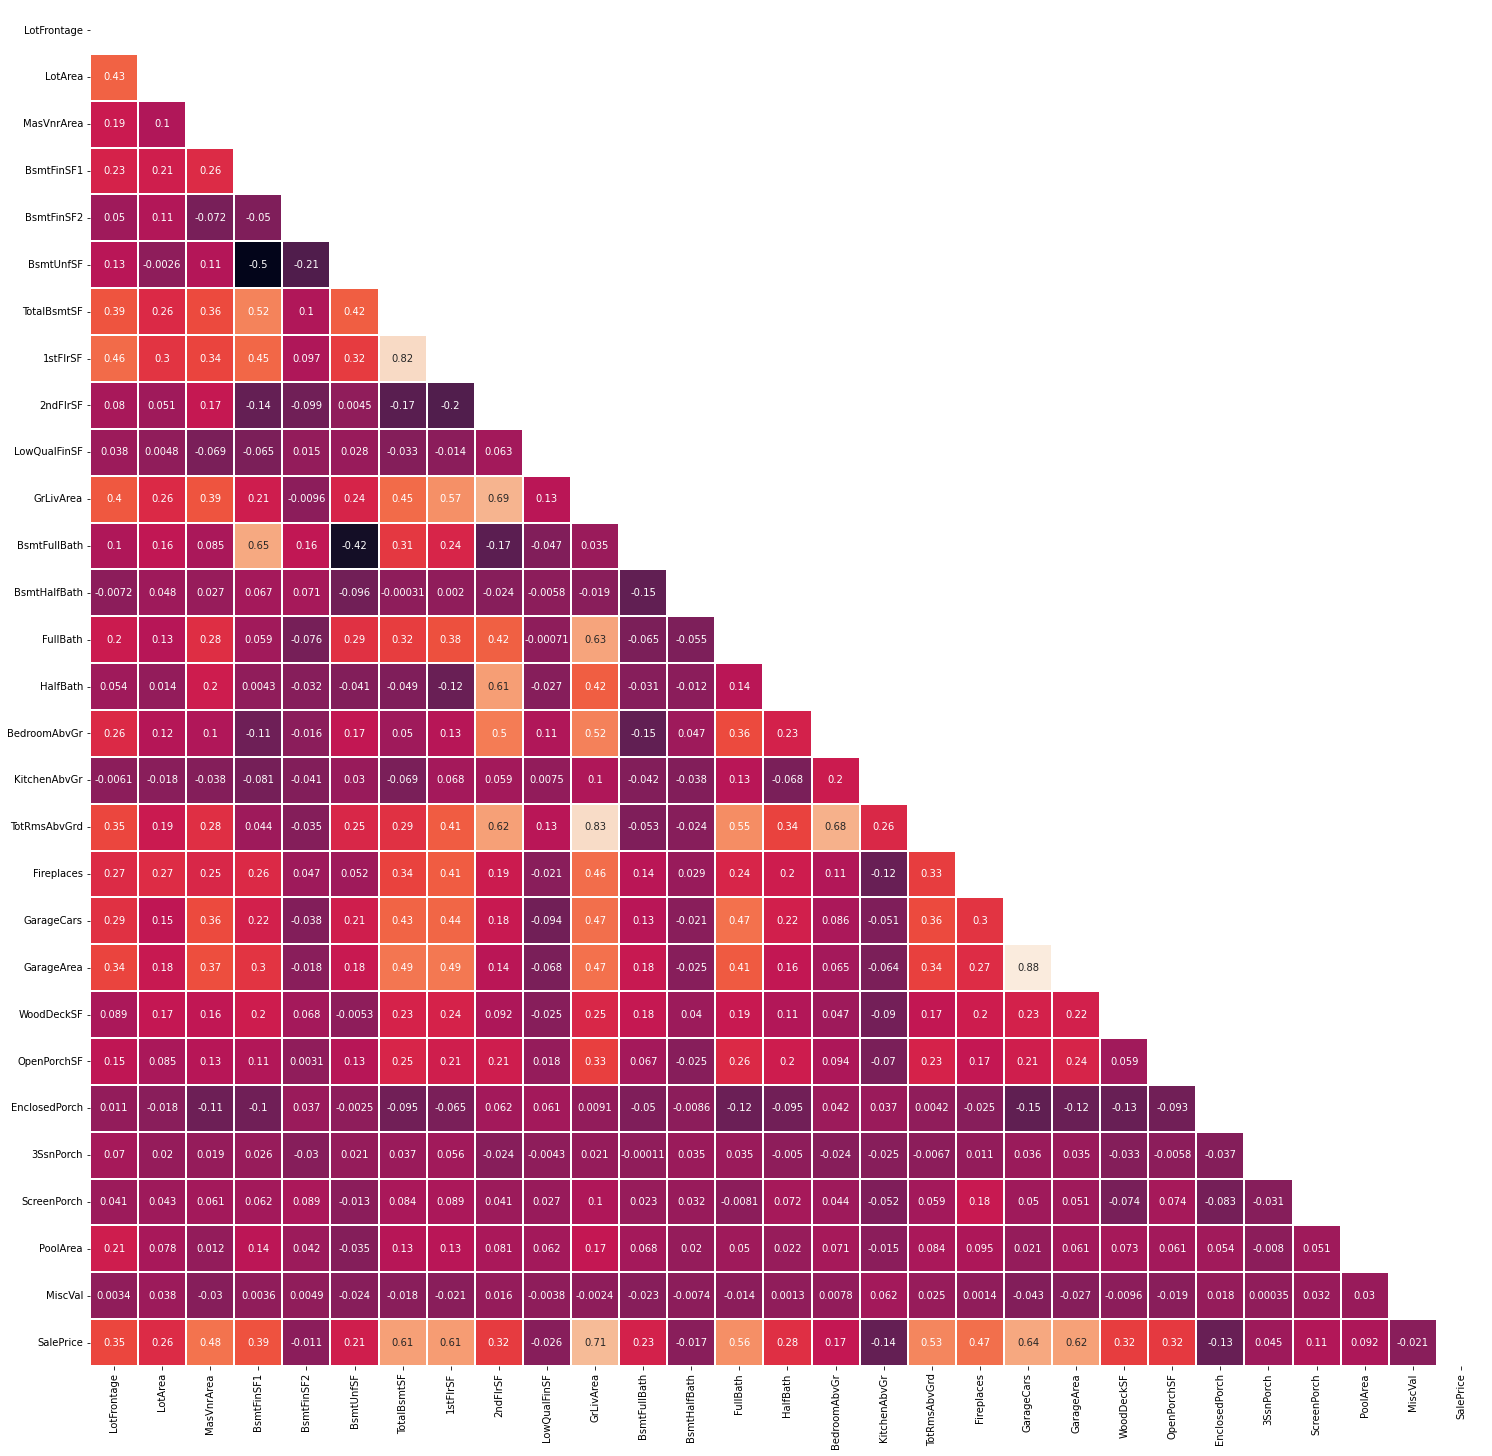

In [9]:
plt.figure(figsize=(25, 25))
sns.heatmap(data=df_raw.corr(), cbar=False, mask=np.triu(np.ones_like(df_raw.corr())), linewidths=0.3, annot=True)

## Data Preprocessing

### Handling Nulls

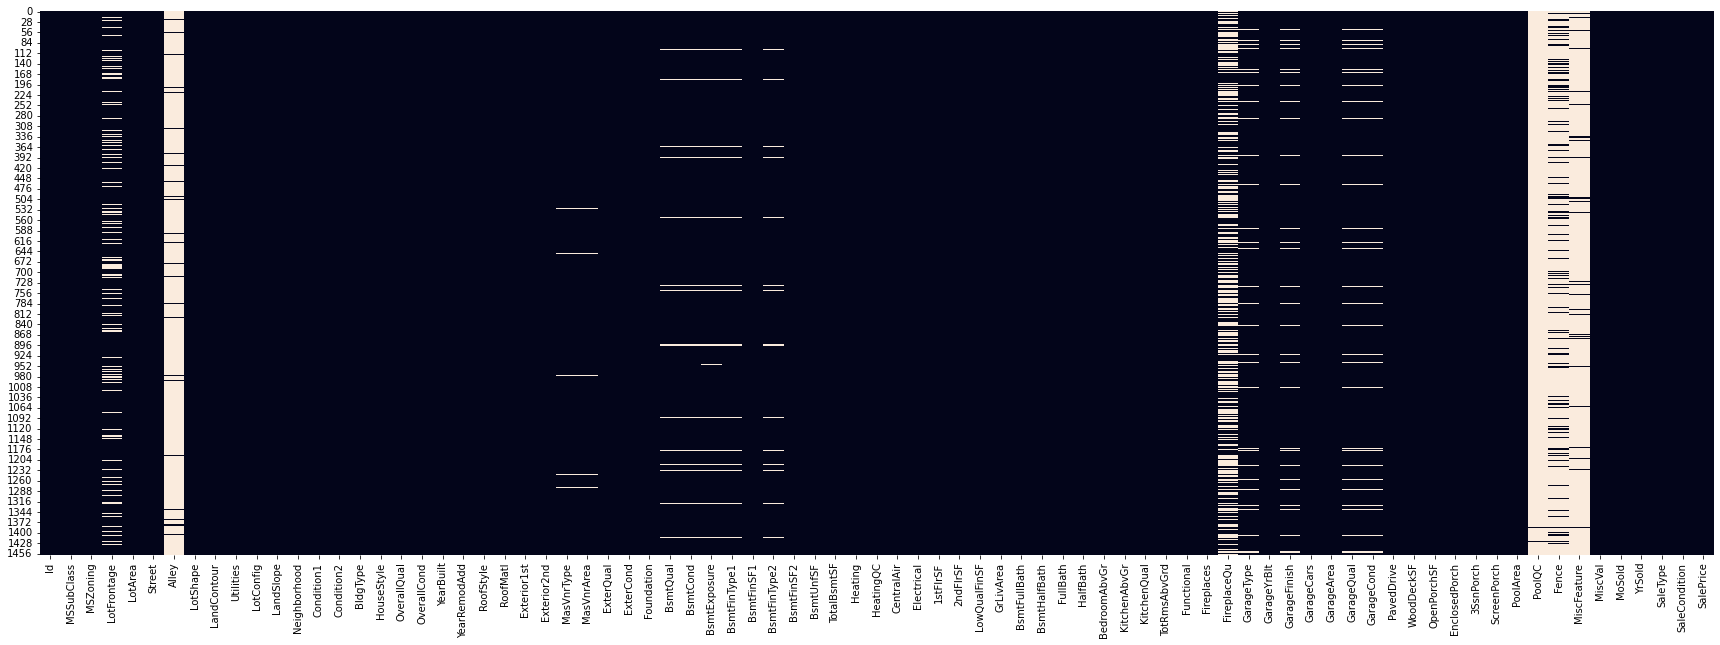

In [10]:
plt.figure(figsize=(30, 10))
ax = sns.heatmap(data=df_raw.isnull(), cbar=False)
ax.tick_params(axis='x', rotation=90)

          column  Nulls_%age
57   FireplaceQu   47.260274
12  Neighborhood    0.000000
14    Condition2    0.000000
7       LotShape    0.000000
42    Electrical    0.068493
41    CentralAir    0.000000


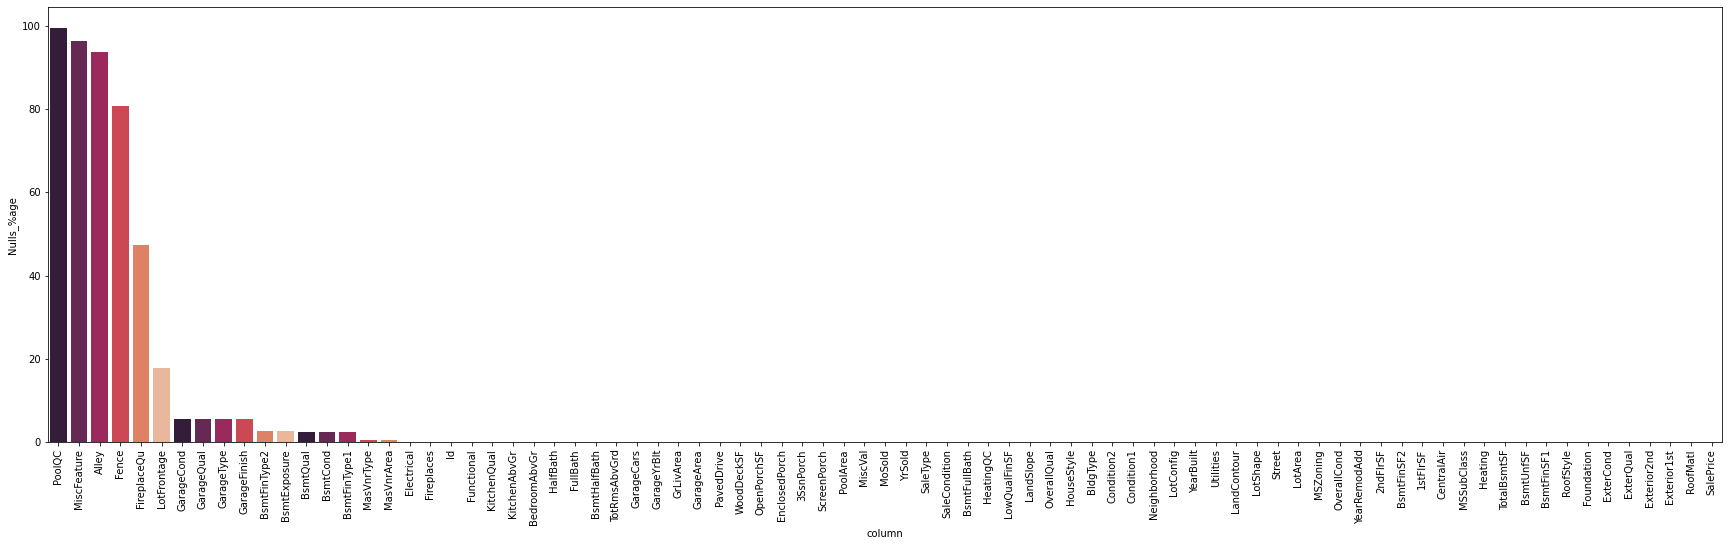

In [11]:
# calculate nulls percentage for each column
# df[df[cat_cols].columns[df[cat_cols].isna().any().tolist()]]
df_nulls_summary = ((df_raw.isnull().sum()/df_raw.shape[0])*100).reset_index().rename(columns = {'index': 'column', 0: 'Nulls_%age'})
print(df_nulls_summary.sample(n=6, random_state=12)) # performed sampling here, as head and tail either gives 0 or 100% nulls

plt.figure(figsize=(30, 8))
ax = sns.barplot(data=df_nulls_summary.sort_values('Nulls_%age', ascending=False), x='column', y='Nulls_%age', palette=sns.color_palette("rocket"))
ax.tick_params(axis='x', rotation=90)

Dropping columns with nulls % > 30%

In [12]:
## dropping cols with nulls %age > 30%
nulls_threshold_percent = 30
cols_removed = {col_:f"[NULLS] -> ({round(null_percent, 1)}% > {nulls_threshold_percent}%)" for col_, null_percent in df_nulls_summary[df_nulls_summary['Nulls_%age'] > nulls_threshold_percent].values}
required_cols = [x for x in df_raw.columns if x not in cols_removed]
cols_removed.keys()

dict_keys(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [13]:
## Row nulls %age
df_nulls_summary_rows = ((df_raw[required_cols].isnull().sum(axis=1)/len(df_raw[required_cols].columns))*100).reset_index().rename(columns={'index':'RowNumber', 0: 'Nulls_%age'})
df_nulls_summary_rows.sort_values(by=['Nulls_%age'], ascending=[False]).head(10)

RowNumber  Nulls_%age
39           39   11.842105
520         520   11.842105
1218       1218   11.842105
1011       1011   11.842105
705         705   11.842105
1179       1179   11.842105
533         533   11.842105
342         342    7.894737
1321       1321    7.894737
1045       1045    7.894737

#### Generate final df

In [14]:
df = df_raw[required_cols].copy()

In [15]:
# these are object type columns ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
dt_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'] # Sold Month - cat and Year sold to duration owned
print(df[dt_cols].isna().sum())
df['GarageYrBlt'] = df['GarageYrBlt'].astype(float).fillna(-999999)


df.select_dtypes('object').columns.tolist()
# df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']], 'MoSold', 'YrSold']

df['building_age'] =  2022 - df['YearBuilt'].apply(int) # YEAR is kept as it is not relevant when we scale
df['building_remod_age'] =  2022 - (df['YearRemodAdd'].apply(int) - df['building_age']) # YEAR is kept as it is not relevant when we scale
df['building_garage_age'] =  df['GarageYrBlt'].apply(lambda x: 2022-int(x)) # YEAR is kept as it is not relevant when we scale
df['duration_owned'] = df['YrSold'].apply(int) - df['YearBuilt'].apply(int)
df['MonthSold'] = df['MoSold'].astype('category')

required_cols_ = [x for x in df.columns if x not in dt_cols]
df = df[required_cols_].copy()
df.shape

YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MoSold          0
YrSold          0
dtype: int64


(1460, 76)

In [16]:
df[['building_age', 'building_remod_age', 'building_garage_age', 'duration_owned', 'MonthSold']].head()

building_age  building_remod_age  building_garage_age  duration_owned  \
0            19                  38                   19               5   
1            46                  92                   46              31   
2            21                  41                   21               7   
3           107                 159                   24              91   
4            22                  44                   22               8   

  MonthSold  
0         2  
1         5  
2         9  
3         2  
4        12

## Training & Test Split

fit only on train set and transform both train & test

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


target_col = "SalePrice"
uid = 'Id'
selected_cols = [x for x in df.columns if x!=target_col]
categorical_vars = [x for x in df[selected_cols].select_dtypes('category').columns if x!=uid] 
numerical_vars = [x for x in df[selected_cols].select_dtypes(include='number').columns if x!=uid]

X, y = df[selected_cols], df[[target_col]]

cols_required_in_proportions = ['Neighborhood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=123, stratify=X[cols_required_in_proportions])
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(978, 75) (482, 75)
(978, 1) (482, 1)


In [18]:
assert len(selected_cols)  - len(numerical_vars) - len(categorical_vars) == 1, "Column count mismatch" # should be equal to 1 coz remaining variable is uid

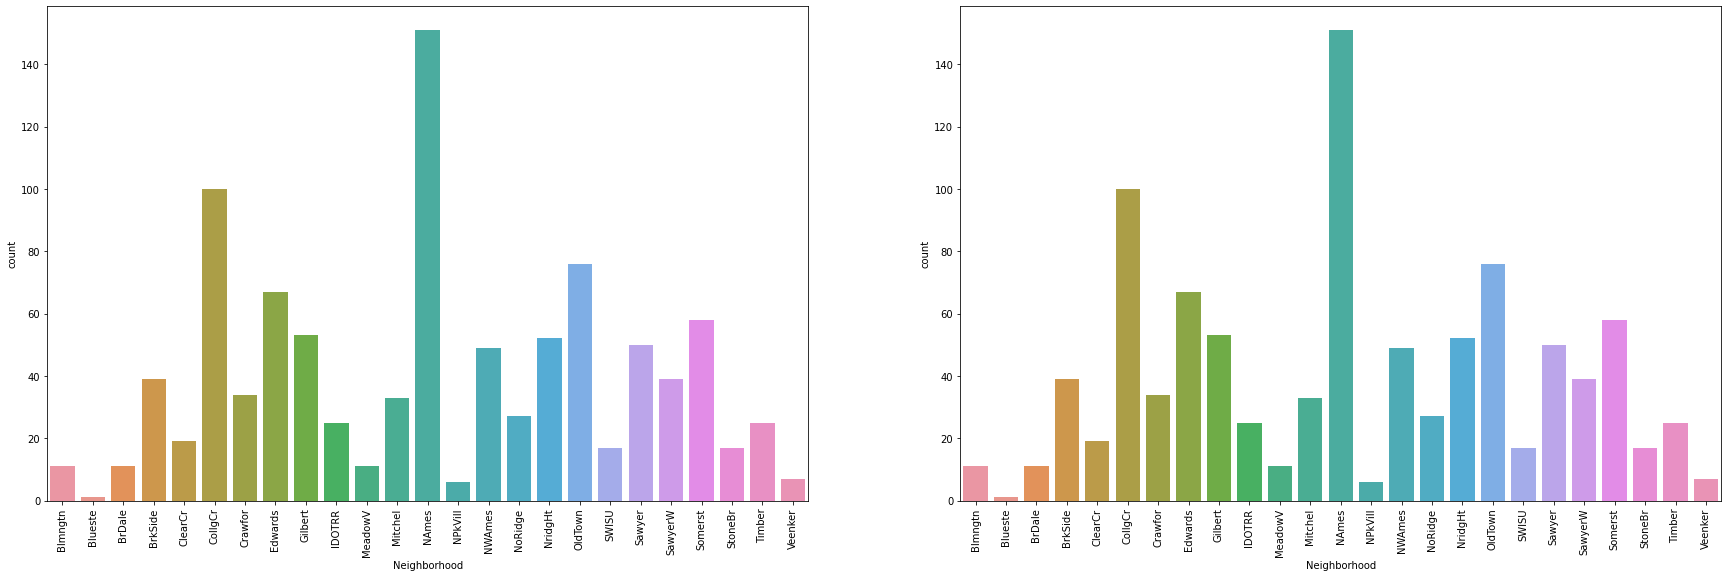

In [19]:
## split with same proportion
plt.figure(figsize=(30, 20))
n_rows = get_n_rows(len(cols_required_in_proportions))*2
flag = 1
cntr = 0
for ix, each_col in enumerate(cols_required_in_proportions):
    cntr += 1
    plt.subplot(n_rows, 2, cntr)
    sns.countplot(X_train[each_col])
    plt.xticks(rotation=90)
    
    cntr += 1
    plt.subplot(n_rows, 2, cntr)
    sns.countplot(X_train[each_col])
    plt.xticks(rotation=90)

### Imputation of missing values

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)

# target_col = "SalePrice"
# selected_cols = [x for x in df.columns if x!=target_col]
# categorical_vars = df[selected_cols].select_dtypes('category').columns
# numerical_vars = df[selected_cols].select_dtypes(include='number').columns

X_train[numerical_vars] = imputer.fit_transform(X_train[numerical_vars])

### Log transform and visualize

### Skewness

| type               | range                               |
| ------------------ | ----------------------------------- |
| Fairly Symmetrical | $-0.5$ to $0.5$                     |
| Moderate Skewed    | $-0.5$ to $-1.0$ and $0.5$ to $1.0$ |
| Highly Skewed      | (left) $< -1.0$ and $> 1.0$ (Right) | 

In [21]:
X_train_skew_metrics = X_train[numerical_vars].agg(['skew', 'kurtosis']).transpose()
skewed_cols = X_train_skew_metrics[((X_train_skew_metrics['skew'] < -1.0) | (X_train_skew_metrics['skew'] > 1.0))].index.tolist()

def log_transform(skewed_cols, df):
    for x in skewed_cols:
        df[x] = df[x].apply(lambda x: np.log(x) if x!=0 else 0)
    return df

X_train_log = log_transform(skewed_cols=skewed_cols, df=X_train)

['#708090', '#00FFFF', '#00FF00', '#0000CD', '#0000FF', '#4B0082', '#90EE90', '#000000', '#8B008B', '#7CFC00', '#708090', '#800000', '#8B0000', '#808080', '#9400D3', '#808000', '#006400', '#008B8B', '#C0C0C0']


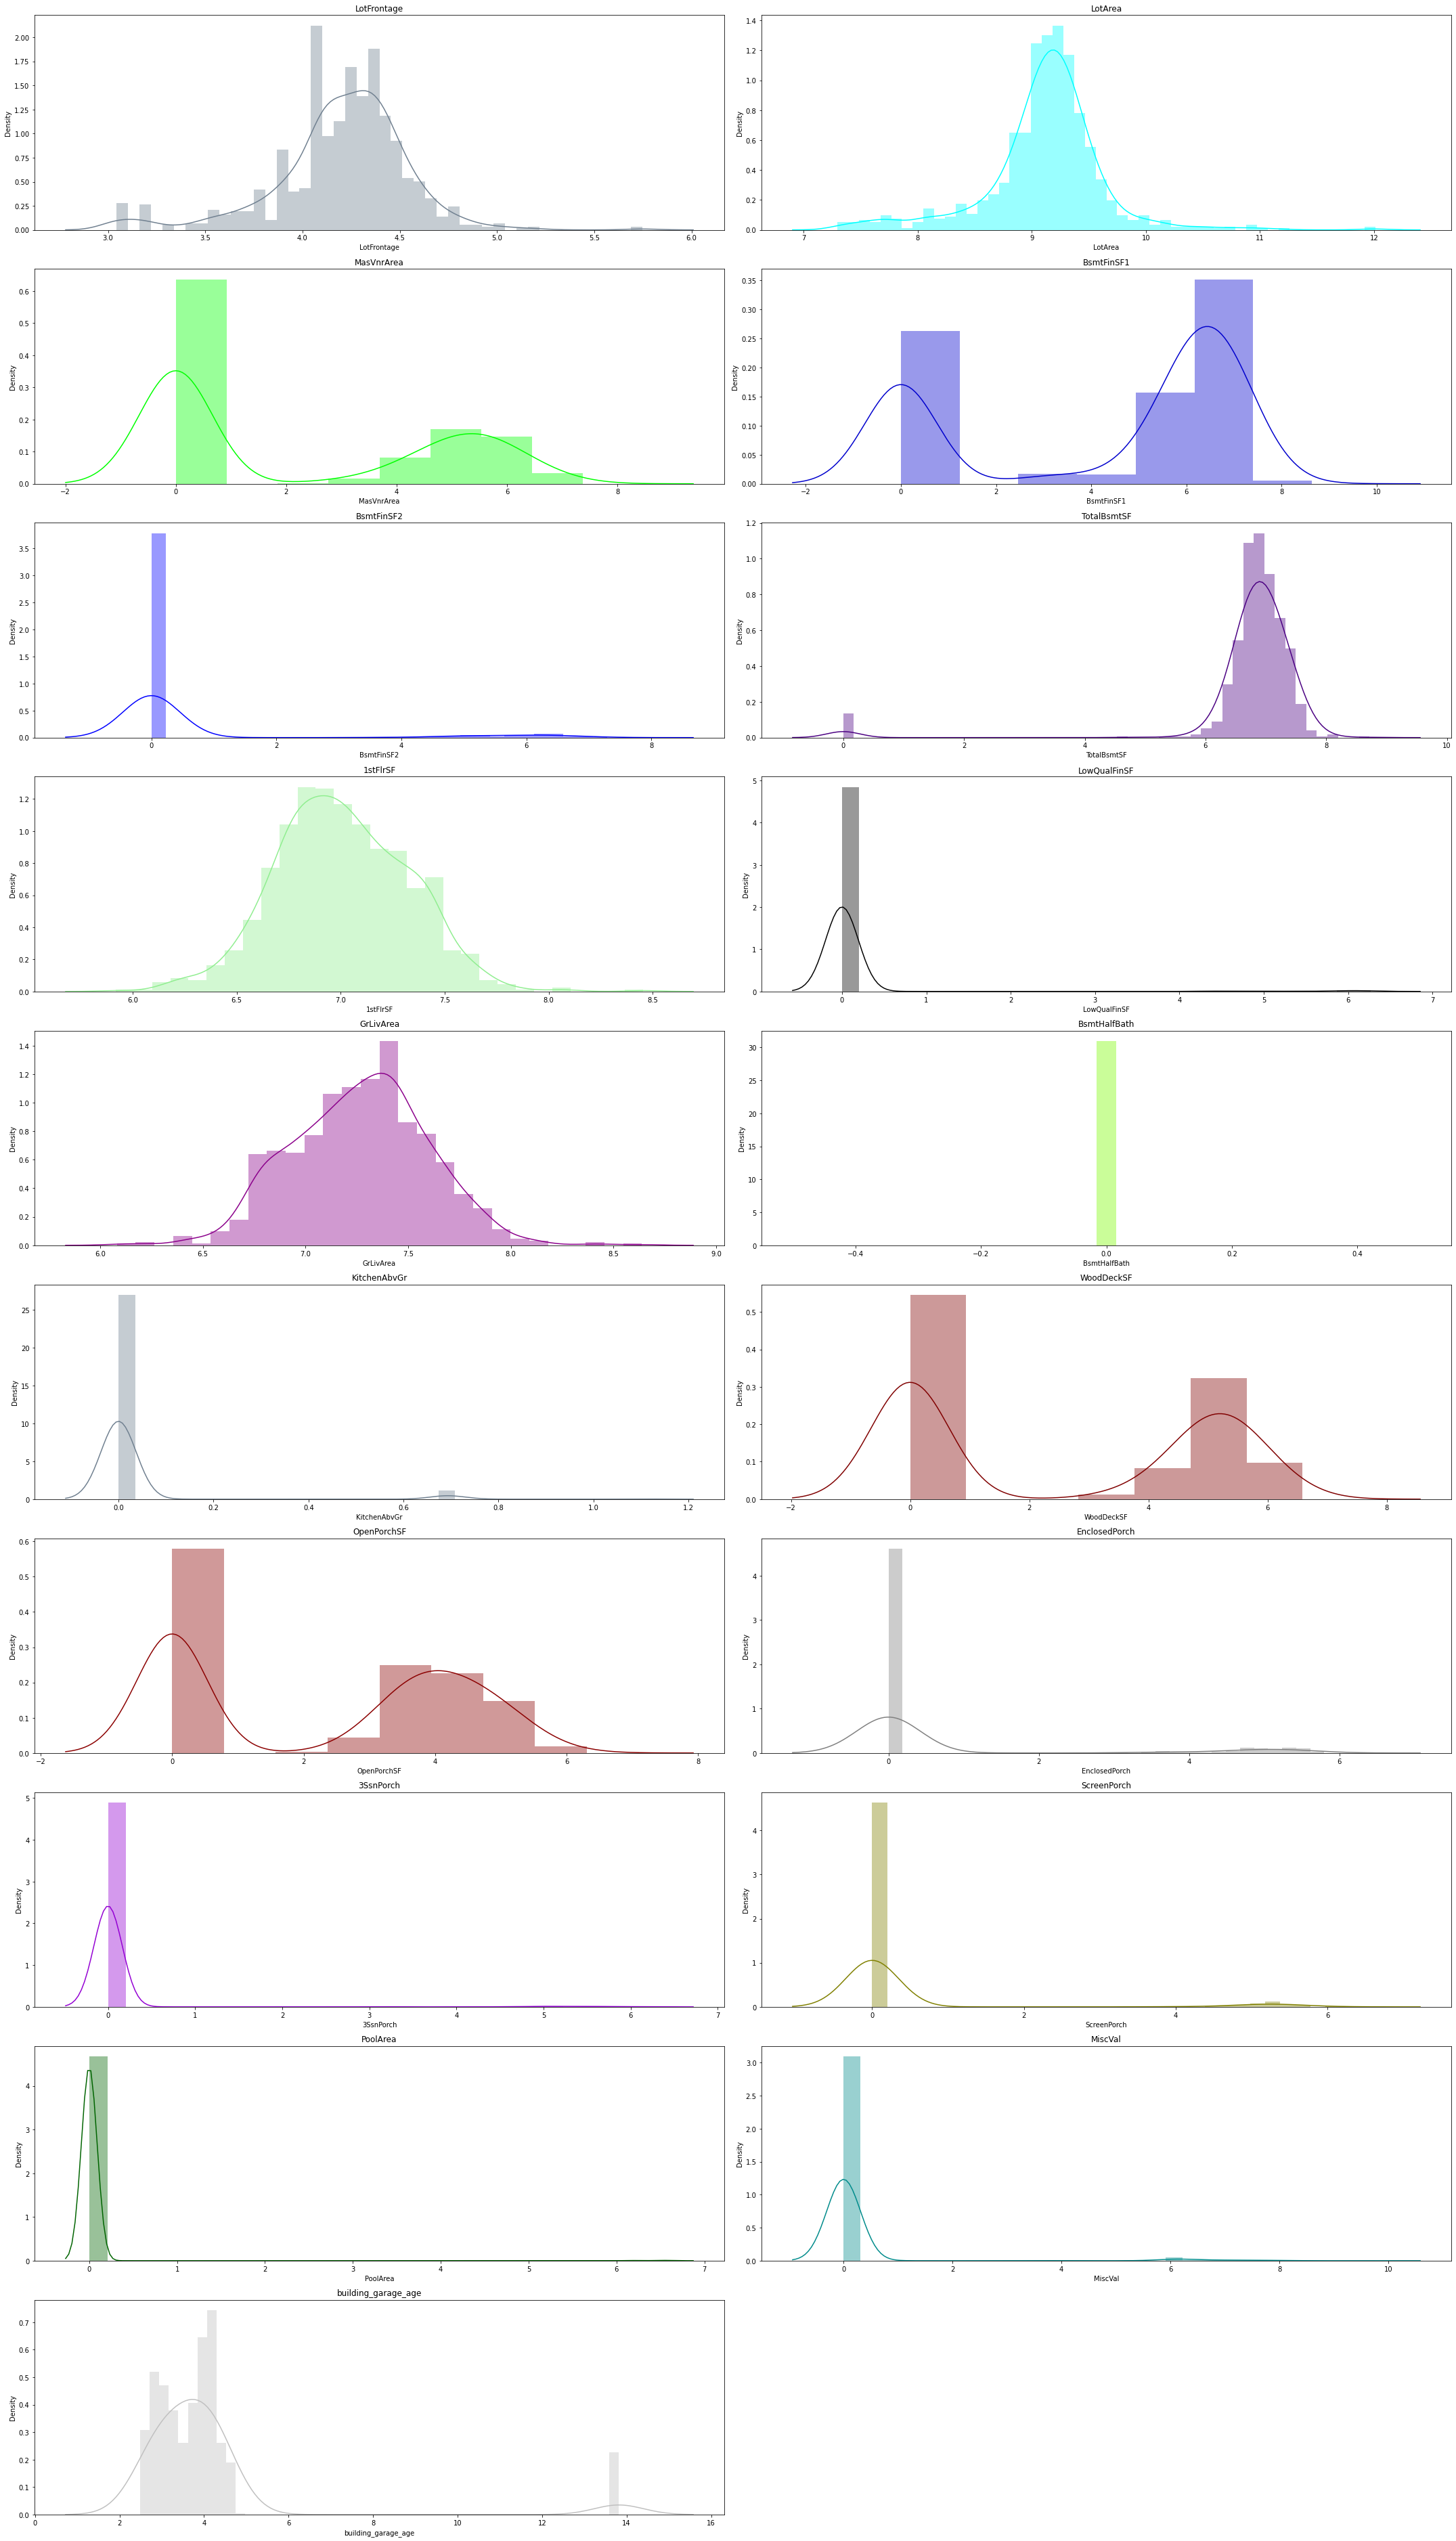

In [22]:
## distribution plots after log transformation
plt.figure(figsize=(30, 2.75*len(skewed_cols)))

n_rows = get_n_rows(len(skewed_cols))

color_tmp = random.sample([col for col in COLORS if col.count('0') > 1], k=len(skewed_cols))
print(color_tmp)

for ix, each_num_var in enumerate(skewed_cols):
    plt.subplot(n_rows, 2, ix+1)
    sns.distplot(X_train_log[each_num_var], color=color_tmp[ix])
    plt.title(each_num_var)

plt.tight_layout()

In [23]:
y_train_log = np.log(y_train)

In [24]:
## Preprocessing Utilities
def scaler_fn(df, interested_vars, remaining_vars, scaler, test_data=False):
    index = df.index
    if not test_data:
        df_scaled_vars = scaler.fit_transform(df[interested_vars])
    else:
        df_scaled_vars = scaler.transform(df[interested_vars])

    df_scaled_vars = pd.DataFrame(df_scaled_vars, columns=scaler.get_feature_names_out(), index=index)
    df_scaled = pd.concat((df[remaining_vars], df_scaled_vars), axis=1)

    return df_scaled

def encoder_fn(df, interested_vars, remaining_vars, encoder, test_data=False):
    index = df.index
    if not test_data:
        df_encoded_vars = encoder.fit_transform(df[interested_vars]).toarray()
    else:
        df_encoded_vars = encoder.transform(df[interested_vars]).toarray()
    
    df_encoded_vars = pd.DataFrame(df_encoded_vars, columns=encoder.get_feature_names_out(), index=index)
    df_encoded = pd.concat((df[remaining_vars], df_encoded_vars), axis=1)

    return df_encoded

In [25]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [26]:
X_train = X_train_log.copy()
y_train = y_train_log.copy()

In [27]:
# numerical_vars, categorical_vars
X_train_scaled = scaler_fn(df=X_train, interested_vars=numerical_vars, remaining_vars=categorical_vars, scaler=scaler, test_data=False)
X_train_encoded = encoder_fn(df=X_train_scaled, interested_vars=categorical_vars, remaining_vars=numerical_vars, encoder=encoder, test_data=False)
X_train_encoded

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1288     0.238502  0.285141    0.000000    0.816643         0.0   0.146832   
830      0.495064  0.442635    0.807620    0.804202         0.0   0.150685   
976      0.328426  0.293801    0.000000    0.000000         0.0   0.188356   
688      0.388581  0.360742    0.000000    0.793113         0.0   0.202911   
452      0.452190  0.390406    0.506613    0.765117         0.0   0.055651   
...           ...       ...         ...         ...         ...        ...   
224      0.588599  0.468957    0.925287    0.465986         0.0   1.000000   
478      0.490408  0.418833    0.788466    0.828960         0.0   0.178510   
827      0.418208  0.371979    0.000000    0.346795         0.0   0.613870   
798      0.592175  0.469680    0.915852    0.000000         0.0   0.824486   
1344     0.517503  0.427929    0.000000    0.000000         0.0   0.311644   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1288     0.838972  0.589839  0.000000           0.0   0.521075      0.333333   
830      0.830324  0.520611  0.000000           0.0   0.452418      0.333333   
976      0.698210  0.334731  0.000000           0.0   0.268069      0.000000   
688      0.832527  0.528190  0.000000           0.0   0.459934      0.333333   
452      0.776673  0.343264  0.463675           0.0   0.543309      0.333333   
...           ...       ...       ...           ...        ...           ...   
224      0.892426  0.734200  0.000000           0.0   0.664247      0.000000   
478      0.853589  0.603626  0.000000           0.0   0.534749      0.333333   
827      0.835322  0.532338  0.000000           0.0   0.464049      0.000000   
798      0.867570  0.656823  0.627137           0.0   0.770709      0.000000   
1344     0.755969  0.264884  0.388889           0.0   0.470006      0.000000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1288           0.0  0.666667       0.0         0.250           0.0   
830            0.0  0.333333       0.5         0.375           0.0   
976            0.0  0.333333       0.0         0.250           0.0   
688            0.0  0.666667       0.0         0.250           0.0   
452            0.0  0.666667       0.5         0.375           0.0   
...            ...       ...       ...           ...           ...   
224            0.0  0.666667       0.0         0.375           0.0   
478            0.0  0.666667       0.0         0.375           0.0   
827            0.0  0.666667       0.0         0.375           0.0   
798            0.0  1.000000       0.5         0.500           0.0   
1344           0.0  0.666667       0.5         0.375           0.0   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1288      0.181818    0.333333        0.50    0.351904    0.812798   
830       0.272727    0.666667        0.50    0.322990    0.000000   
976       0.090909    0.000000        0.00    0.000000    0.000000   
688       0.363636    0.333333        0.50    0.399859    0.749836   
452       0.363636    0.000000        0.50    0.297602    0.754110   
...            ...         ...         ...         ...         ...   
224       0.454545    0.333333        0.75    0.682652    0.836597   
478       0.363636    0.333333        0.75    0.582511    0.809908   
827       0.272727    0.333333        0.50    0.371650    0.860337   
798       0.727273    0.666667        0.75    0.578279    0.754110   
1344      0.454545    0.333333        0.50    0.310296    0.000000   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1288     0.646771            0.0        0.0     0.000000       0.0      0.0   
830      0.000000            0.0        0.0     0.851584       0.0      0.0   
976      0.000000            0.0        0.0     0.000000       0.0      0.0   
688      0.000000            0.0        0.0     0.000000       0.0      0.0   
452      0.762005            0.

In [28]:
X_test[numerical_vars] = imputer.transform(X_test[numerical_vars])
X_test_log = log_transform(skewed_cols=skewed_cols, df=X_test)
y_test_log = np.log(y_test)

X_test = X_test_log.copy()
y_test = y_test_log.copy()

# numerical_vars, categorical_vars
X_test_scaled = scaler_fn(df=X_test, interested_vars=numerical_vars, remaining_vars=categorical_vars, scaler=scaler, test_data=True)
X_test_encoded = encoder_fn(df=X_test_scaled, interested_vars=categorical_vars, remaining_vars=numerical_vars, encoder=encoder, test_data=True)
X_test_encoded

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
550      0.342664  0.213619    0.000000    0.732333         0.0   0.218322   
954      0.189077  0.392607    0.748393    0.793113         0.0   0.000000   
824      0.499662  0.430077    0.000000    0.000000         0.0   0.637414   
1001     0.388581  0.275015    0.000000    0.000000         0.0   0.295805   
637      0.321097  0.297366    0.000000    0.000000         0.0   0.347175   
...           ...       ...         ...         ...         ...        ...   
1130     0.418208  0.353133    0.000000    0.744696         0.0   0.214041   
730      0.229131  0.274583    0.000000    0.818822         0.0   0.177654   
121      0.321097  0.299477    0.000000    0.000000         0.0   0.313356   
472      0.189077  0.193374    0.593951    0.709516         0.0   0.037671   
96       0.485693  0.411261    0.706107    0.817043         0.0   0.182363   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
550      0.800038  0.416450  0.000000           0.0   0.349115      0.000000   
954      0.785895  0.382156  0.000000           0.0   0.315104      0.000000   
824      0.838051  0.547187  0.000000           0.0   0.478775      0.000000   
1001     0.749986  0.244305  0.000000           0.0   0.178389      0.000000   
637      0.768354  0.307479  0.307692           0.0   0.451010      0.000000   
...           ...       ...       ...           ...        ...           ...   
1130     0.805589  0.502042  0.348825           0.0   0.590482      0.333333   
730      0.845939  0.579478  0.000000           0.0   0.510800      0.333333   
121      0.756598  0.288036  0.187500           0.0   0.368397      0.000000   
472      0.723179  0.417556  0.000000           0.0   0.350212      0.333333   
96       0.845435  0.572583  0.000000           0.0   0.503961      0.000000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
550       0.000000  0.666667       0.0         0.250       0.00000   
954       0.693147  0.666667       0.0         0.500       0.00000   
824       0.000000  0.666667       0.0         0.375       0.00000   
1001      0.000000  0.333333       0.0         0.250       0.00000   
637       0.000000  0.666667       0.0         0.375       0.63093   
...            ...       ...       ...           ...           ...   
1130      0.000000  0.666667       0.0         0.500       0.00000   
730       0.000000  0.666667       0.0         0.250       0.00000   
121       0.000000  0.333333       0.0         0.375       0.00000   
472       0.000000  0.333333       0.0         0.250       0.00000   
96        0.000000  0.666667       0.0         0.375       0.00000   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
550       0.090909    0.000000        0.50    0.310296    0.000000   
954       0.090909    0.000000        0.00    0.000000    0.000000   
824       0.363636    0.333333        0.50    0.547250    0.000000   
1001      0.090909    0.000000        0.25    0.152327    0.000000   
637       0.363636    0.000000        0.25    0.180536    0.000000   
...            ...         ...         ...         ...         ...   
1130      0.363636    0.666667        0.50    0.406206    0.920460   
730       0.181818    0.333333        0.50    0.428773    0.829713   
121       0.090909    0.000000        0.25    0.186178    0.000000   
472       0.181818    0.000000        0.50    0.370240    0.000000   
96        0.272727    0.000000        0.50    0.332863    0.768189   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
550      0.635636       0.000000        0.0     0.858196       0.0      0.0   
954      0.000000       0.000000        0.0     0.000000       0.0      0.0   
824      0.783834       0.000000        0.0     0.000000       0.0      0.0   
1001     0.475178       0.783449        0.0     0.000000       0.0      0.0   
637      0.000000       0.00000

## Model Fitting
### Baseline Regression Model

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE

lr = LinearRegression()
lr.fit(X_train_encoded, y_train)

pred_train = lr.predict(X_train_encoded)
pred_train[:3], y_train[:3][target_col].tolist()

(array([[12.5109787 ],
        [12.07678986],
        [11.38704681]]),
 [12.535376392672774, 12.01974306733868, 11.356271654924852])

In [ ]:
# # Lets calculate some metrics such as R2 score, RSS and RMSE

# y_pred_train = lasso.predict(X_train)
# y_pred_test = lasso.predict(X_test)

# metric3 = []
# r2_train_lr = r2_score(y_train, y_pred_train)
# print(r2_train_lr)
# metric3.append(r2_train_lr)

# r2_test_lr = r2_score(y_test, y_pred_test)
# print(r2_test_lr)
# metric3.append(r2_test_lr)

# rss1_lr = np.sum(np.square(y_train - y_pred_train))
# print(rss1_lr)
# metric3.append(rss1_lr)

# rss2_lr = np.sum(np.square(y_test - y_pred_test))
# print(rss2_lr)
# metric3.append(rss2_lr)

# mse_train_lr = mean_squared_error(y_train, y_pred_train)
# print(mse_train_lr)
# metric3.append(mse_train_lr**0.5)

# mse_test_lr = mean_squared_error(y_test, y_pred_test)
# print(mse_test_lr)
# metric3.append(mse_test_lr**0.5)

In [145]:
from sklearn.metrics import r2_score, mean_squared_error

def plot_df_preds(y_true, y_pred, title='Train'):
    plot_df = pd.DataFrame()
    plot_df = y_true.reset_index()
    plot_df['prediction'] = y_pred
    fig, ax = plt.subplots(1, 1, figsize=(25, 10))
    sns.scatterplot(data=plot_df, x='index', y='SalePrice', marker='o', ax=ax)
    sns.scatterplot(data=plot_df, x='index', y='prediction', color='red', ax=ax)
    ax.set_title(title)
    fig.show()

def check_assumptions(y_true, y_pred, disable_fig=False):
    # Residual analysis
    y_res = y_true - y_pred

    print("\nAssumptions of Linear Regression")
    print("\t ----------> Residuals Mean:", round(y_res.mean().values[0], 2))

    if not disable_fig:
        # data['res'] = y_res
        plt.scatter(y_pred, y_res)
        plt.axhline(y=0, color='r', linestyle=':')
        plt.xlabel("Predictions")
        plt.ylabel("Residual")
        plt.show()

        # Distribution of errors
        sns.distplot(y_res,kde=True)
        plt.title('Normality of error terms/residuals')
        plt.xlabel("Residual")
        plt.show()

def model_summary_train_test(mdl, X_train, X_test, y_train, y_test, mdl_name, disable_fig=False):
    mdl.fit(X_train, y_train)
    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)

    print("Sample Predictions for Train")
    print("\t ----------> Pred:", pred_train[:3].reshape(-1).tolist())
    print("\t ----------> Actual:", y_train[:3][target_col].tolist())

    print("\nSample Predictions for Test")
    print("\t ----------> Pred:", pred_test[:3].reshape(-1).tolist())
    print("\t ----------> Actual:", y_test[:3][target_col].tolist())

    __pred_ndim = pred_train.ndim
    if __pred_ndim==1:
        pred_train = np.expand_dims(pred_train, axis=1)
        pred_test = np.expand_dims(pred_test, axis=1)

    print(f"y_train: {y_train.shape}, pred_train: {pred_train.shape}")
    print(f"y_test: {y_test.shape}, pred_test: {pred_test.shape}")

    # print("\nTraining R2 Score: ", )
    # print("Test R2 Score: ", )

    metrics = {}
    metrics['R2 Score (Train)'] = round(r2_score(y_true=y_train, y_pred=pred_train), 5)
    metrics['R2 Score (Test)'] = round(r2_score(y_true=y_test, y_pred=pred_test), 5)

    # if __pred_ndim==1:
    #     metrics['RSS (Train)'] = round(np.sum(np.square(y_train - pred_train)), 5)
    #     metrics['RSS (Test)'] = round(np.sum(np.square(y_test - pred_test)), 5)
    # else:
    metrics['RSS (Train)'] = round(np.sum(np.square(y_train - pred_train)).values[0], 5)
    metrics['RSS (Test)'] = round(np.sum(np.square(y_test - pred_test)).values[0], 5)
    metrics['MSE (Train)'] = round(mean_squared_error(y_train, pred_train), 5)
    metrics['MSE (Test)'] = round(mean_squared_error(y_test, pred_test), 5)

    check_assumptions(y_true=y_train, y_pred=pred_train, disable_fig=disable_fig)

    if not disable_fig:
        plot_df_preds(y_true=y_train, y_pred=pred_train)
        plot_df_preds(y_true=y_test, y_pred=pred_test, title='Test')
    
    print('\n'.join([f"{k}:{v}" for k,v in metrics.items()]))

    return (mdl, metrics)

Sample Predictions for Train
	 ----------> Pred: [12.510978698730469, 12.076789855957031, 11.387046813964844]
	 ----------> Actual: [12.535376392672774, 12.01974306733868, 11.356271654924852]

Sample Predictions for Test
	 ----------> Pred: [11.902633666992188, 101058548747.60213, 12.421928405761719]
	 ----------> Actual: [11.84939770159144, 11.755871643580617, 12.3570755190667]
y_train: (978, 1), pred_train: (978, 1)
y_test: (482, 1), pred_test: (482, 1)

Assumptions of Linear Regression
	 ----------> Residuals Mean: -0.0


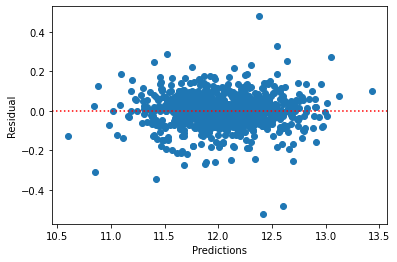

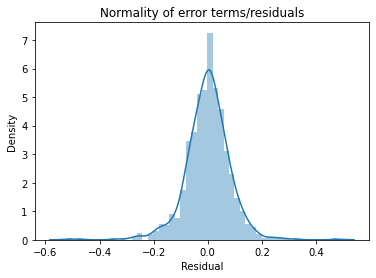

R2 Score (Train):0.95472
R2 Score (Test):-3.084161975817346e+20
RSS (Train):6.5736
RSS (Test):2.70257936429685e+22
MSE (Train):0.00672
MSE (Test):5.607011129246577e+19


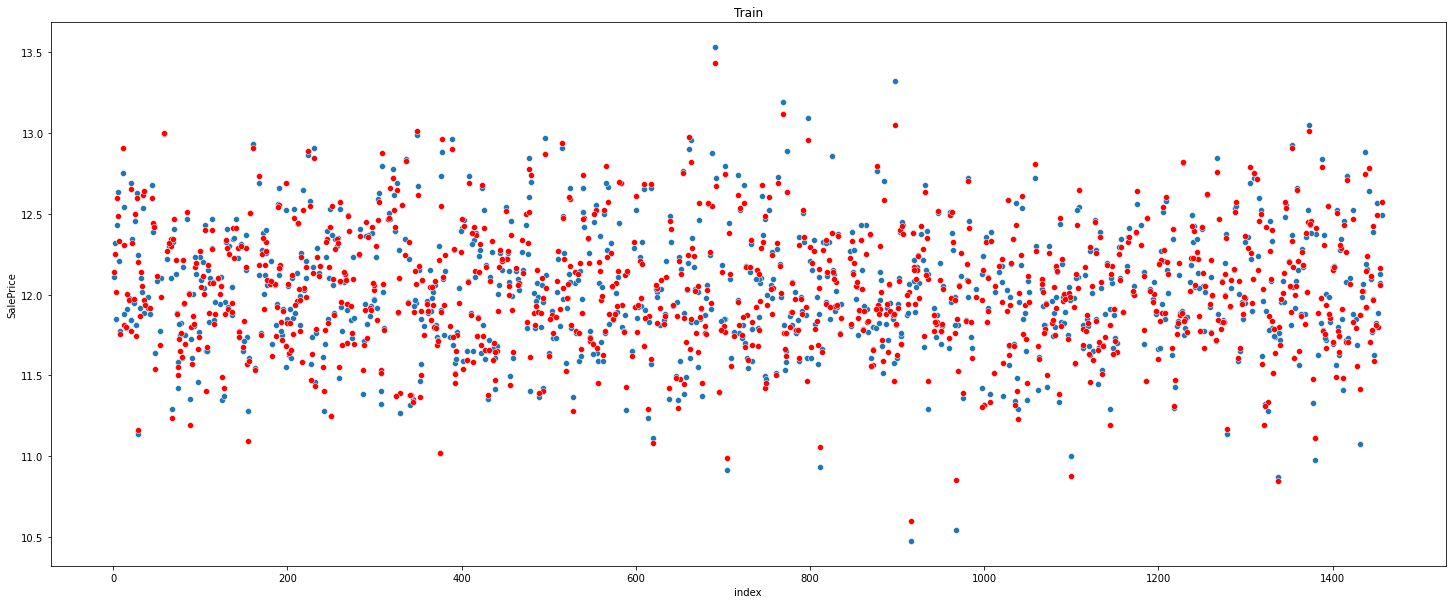

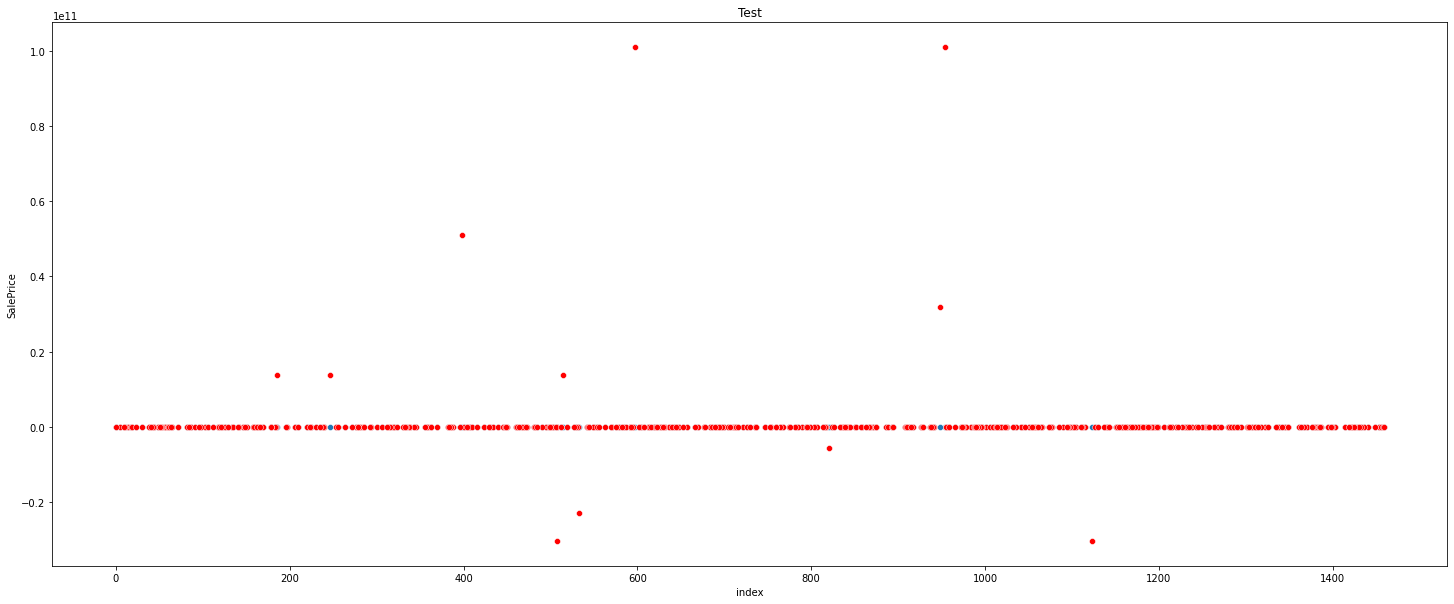

In [146]:
_ = model_summary_train_test(mdl=LinearRegression(), X_train=X_train_encoded, X_test=X_test_encoded, y_train=y_train, y_test=y_test, mdl_name='Linear Regression')

Sample Predictions for Train
	 ----------> Pred: [12.511531887983708, 12.078310100381913, 11.388258500112217]
	 ----------> Actual: [12.535376392672774, 12.01974306733868, 11.356271654924852]

Sample Predictions for Test
	 ----------> Pred: [11.897603650294368, 11.972483100473834, 12.400013865003022]
	 ----------> Actual: [11.84939770159144, 11.755871643580617, 12.3570755190667]
y_train: (978, 1), pred_train: (978, 1)
y_test: (482, 1), pred_test: (482, 1)

Assumptions of Linear Regression
	 ----------> Residuals Mean: 0.0


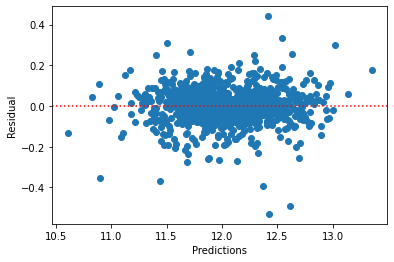

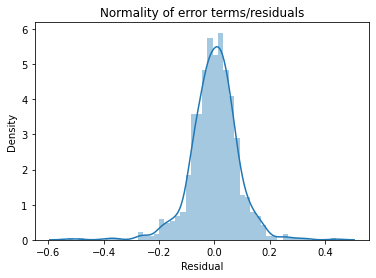

R2 Score (Train):0.95076
R2 Score (Test):0.89316
RSS (Train):7.14835
RSS (Test):9.36252
MSE (Train):0.00731
MSE (Test):0.01942


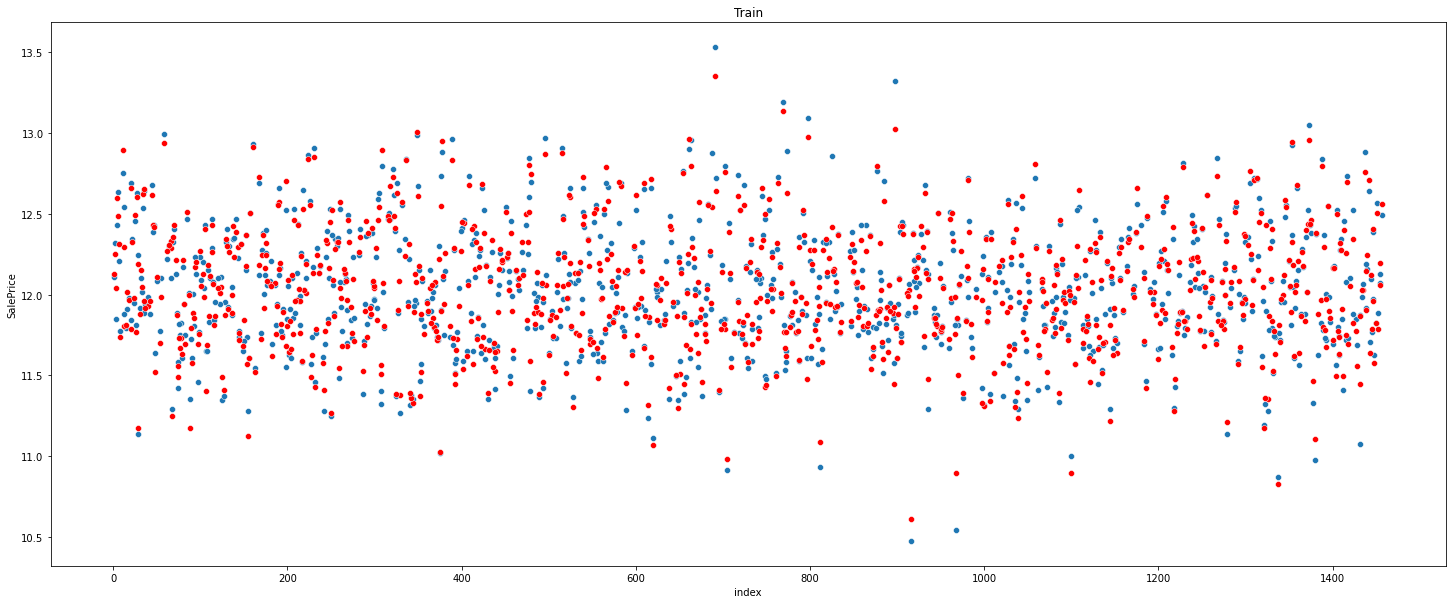

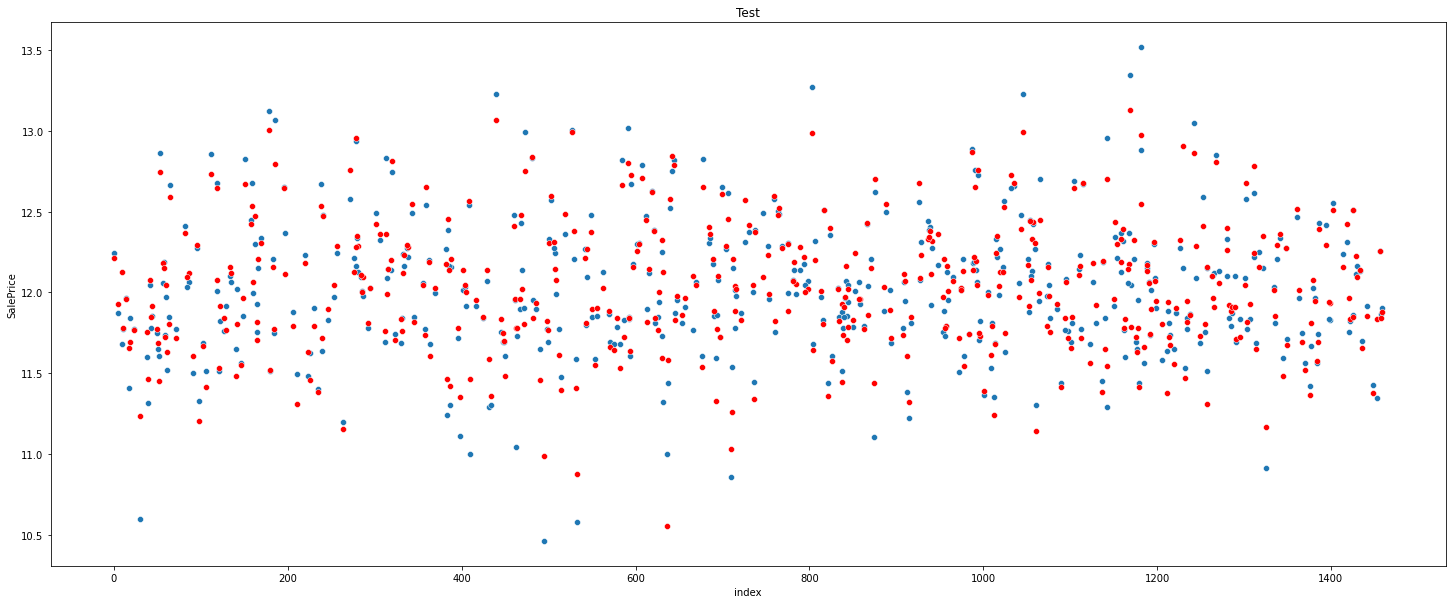

In [148]:
_ = model_summary_train_test(mdl=Ridge(alpha=0.1), X_train=X_train_encoded, X_test=X_test_encoded, y_train=y_train, y_test=y_test, mdl_name='Ridge')

Sample Predictions for Train
	 ----------> Pred: [12.515424985270394, 12.068199581376355, 11.407941905964071]
	 ----------> Actual: [12.535376392672774, 12.01974306733868, 11.356271654924852]

Sample Predictions for Test
	 ----------> Pred: [11.873276278658167, 11.913525668702395, 12.39841016209118]
	 ----------> Actual: [11.84939770159144, 11.755871643580617, 12.3570755190667]
y_train: (978, 1), pred_train: (978, 1)
y_test: (482, 1), pred_test: (482, 1)

Assumptions of Linear Regression
	 ----------> Residuals Mean: -0.0


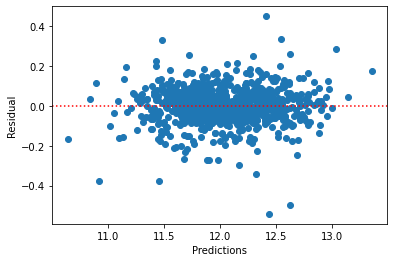

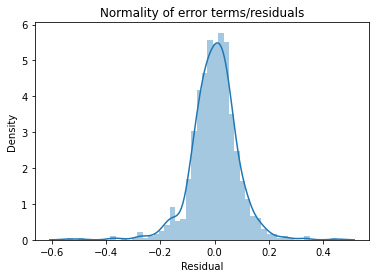

R2 Score (Train):0.95082
R2 Score (Test):0.9037
RSS (Train):7.139
RSS (Test):8.43856
MSE (Train):0.0073
MSE (Test):0.01751


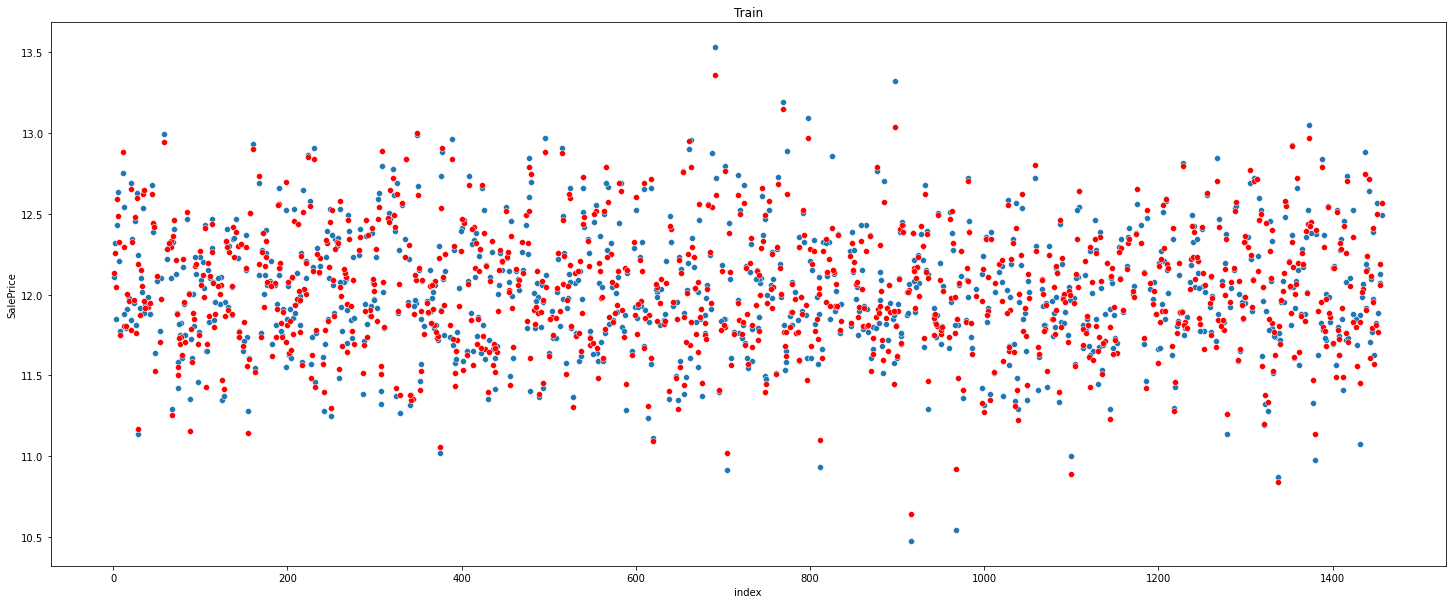

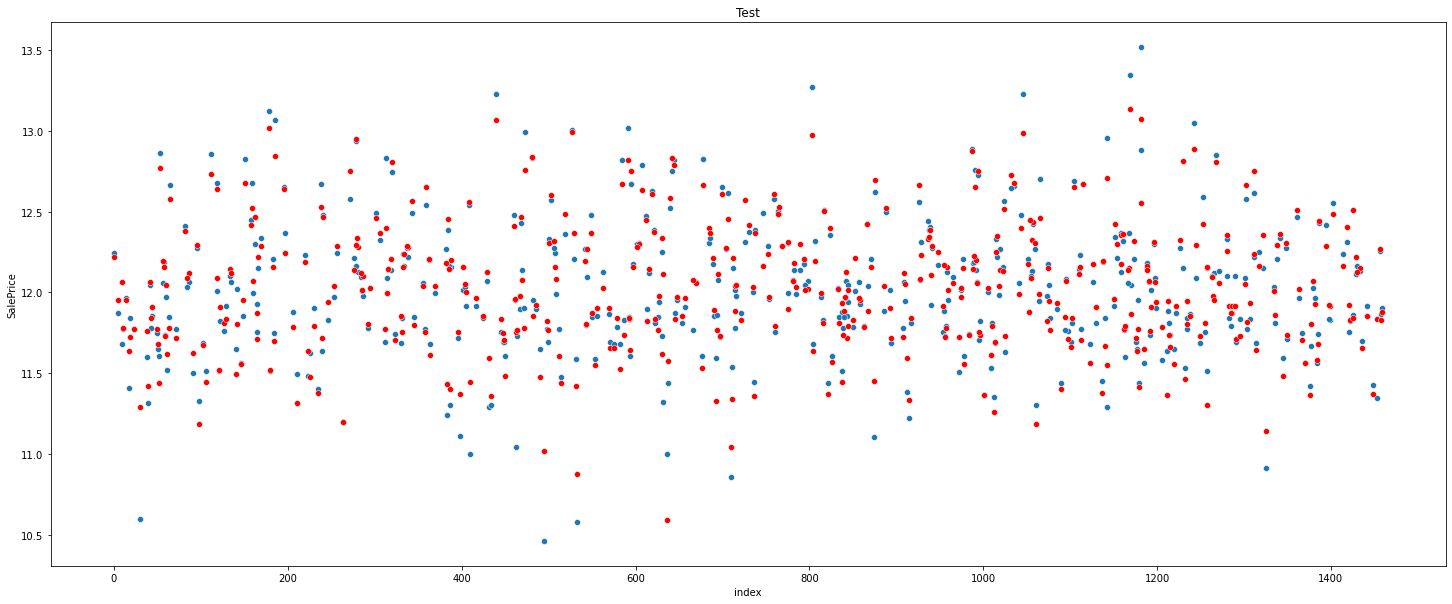

In [150]:
_ = model_summary_train_test(mdl=Lasso(alpha=0.00005), X_train=X_train_encoded, X_test=X_test_encoded, y_train=y_train, y_test=y_test, mdl_name='lasso')

## GridSearch CV

In [151]:
from sklearn.model_selection import GridSearchCV

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.000015, 0.000025, 0.00005, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_encoded, y_train)
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 31 candidates, totalling 155 fits
{'alpha': 2.0}


In [152]:
# cross validation
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_encoded, y_train)
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
{'alpha': 0.001}


### Run following models & generate metrics

In [169]:
models_to_try = {
    'lr': LinearRegression(),
    'ridge': Ridge(alpha=2.0),
    'lasso': Lasso(alpha=0.001)
}

models_log = {}
# import time

for mdl in models_to_try:
    print(f"==================================== {mdl} ====================================")
    models_log[mdl] = model_summary_train_test(mdl=models_to_try[mdl], X_train=X_train_encoded, X_test=X_test_encoded, y_train=y_train, y_test=y_test, mdl_name=mdl, disable_fig=True)
    # time.sleep(5)

==================================== lr ====================================
Sample Predictions for Train
	 ----------> Pred: [12.510978698730469, 12.076789855957031, 11.387046813964844]
	 ----------> Actual: [12.535376392672774, 12.01974306733868, 11.356271654924852]

Sample Predictions for Test
	 ----------> Pred: [11.902633666992188, 101058548747.60213, 12.421928405761719]
	 ----------> Actual: [11.84939770159144, 11.755871643580617, 12.3570755190667]
y_train: (978, 1), pred_train: (978, 1)
y_test: (482, 1), pred_test: (482, 1)

Assumptions of Linear Regression
	 ----------> Residuals Mean: -0.0
R2 Score (Train):0.95472
R2 Score (Test):-3.084161975817346e+20
RSS (Train):6.5736
RSS (Test):2.70257936429685e+22
MSE (Train):0.00672
MSE (Test):5.607011129246577e+19
==================================== ridge ====================================
Sample Predictions for Train
	 ----------> Pred: [12.48583011756508, 12.043657336997693, 11.401594767044434]
	 ----------> Actual: [12.53537639267

In [170]:
pd.DataFrame(data=[models_log[mdl][1] for mdl in models_log], index=[models_log[mdl][0] for mdl in models_log]).transpose()

LinearRegression()  Ridge(alpha=2.0)  Lasso(alpha=0.001)
R2 Score (Train)        9.547200e-01           0.93727             0.91020
R2 Score (Test)        -3.084162e+20           0.89662             0.89268
RSS (Train)             6.573600e+00           9.10616            13.03574
RSS (Test)              2.702579e+22           9.05861             9.40408
MSE (Train)             6.720000e-03           0.00931             0.01333
MSE (Test)              5.607011e+19           0.01879             0.01951

In [171]:
betas = pd.DataFrame(index=X_train_encoded.columns,
    columns=['Linear Regression', 'Ridge Regression', 'Lasso Regression']
)
betas['Linear Regression'] = models_log['lr'][0].coef_.reshape(-1)
betas['Ridge Regression'] = models_log['ridge'][0].coef_.reshape(-1)
betas['Lasso Regression'] = models_log['lasso'][0].coef_.reshape(-1)

pd.set_option("display.max_rows", None)
betas.head(10)

Linear Regression  Ridge Regression  Lasso Regression
LotFrontage           -0.007034          0.035762          0.000000
LotArea                0.493221          0.215791          0.186793
MasVnrArea            -0.000865          0.006609          0.000000
BsmtFinSF1             0.136965          0.167946          0.103878
BsmtFinSF2             0.075939          0.048281          0.000000
BsmtUnfSF             -0.113341          0.042230          0.000000
TotalBsmtSF            1.101597          0.132713          0.076961
1stFlrSF              -0.114931          0.291381          0.197138
2ndFlrSF               0.130224          0.168031          0.000000
LowQualFinSF          -0.015968         -0.011887         -0.000000

In [176]:
betas['abs_lasso'] = betas[['Lasso Regression']].apply(abs)
betas['abs_ridge'] = betas[['Ridge Regression']].apply(abs)
betas[['Lasso Regression', 'abs_lasso']].sort_values(by=['abs_lasso'], ascending=[False]).head(10)

Lasso Regression  abs_lasso
GrLivArea                     0.845953   0.845953
building_remod_age           -0.235218   0.235218
OverallQual_9                 0.201675   0.201675
1stFlrSF                      0.197138   0.197138
LotArea                       0.186793   0.186793
GarageCars                    0.186527   0.186527
Neighborhood_Crawfor          0.122318   0.122318
OverallQual_3                -0.116248   0.116248
OverallQual_8                 0.112584   0.112584
BsmtFinSF1                    0.103878   0.103878

In [177]:
some_betas_df = betas.reset_index()
some_betas_df['feature'] = some_betas_df['index'].apply(lambda x: x.rsplit('_')[0] if x in encoder.get_feature_names_out().tolist() else x)

In [180]:
print("======= Ridge top 5 features =======")
print("\n".join(some_betas_df.sort_values(by=['abs_ridge'], ascending=[False])['feature'].unique().tolist()[:5]))

======= Ridge top 5 features =======
GrLivArea
1stFlrSF
LotArea
OverallQual
2ndFlrSF


In [179]:
print("======= Lasso top 5 features =======")
print("\n".join(some_betas_df.sort_values(by=['abs_lasso'], ascending=[False])['feature'].unique().tolist()[:5]))

======= Lasso top 5 features =======
GrLivArea
building_remod_age
OverallQual
1stFlrSF
LotArea
